---
# <font color="DarkBlue"><b><center>Escuela Politécnica Nacional</center></b></font>
---

## <font color="DarkGreen"><center>Ransomware dynamics: Mitigating personal data exfiltration through the SCIRAS lens</font>

## <font color="DarkGreen"><center>T-SNE VISUALIZATION</font>

**Author:** David Cevallos-Salas, José Estrada-Jiménez, Danny S. Guamán, Luis Felipe Urquiza

**Date:** 2024-10-17

**Google Colab Link:**
https://colab.research.google.com/drive/1zV7ki9WaSRa7YTuaGOV0gjkrCMKbQteT

In [1]:
# Importing libraries
from os import X_OK
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import zipfile
import os

In [2]:
!git clone https://github.com/dcevallossalas/ransmap1

node = "dataset"
y = np.array([])
first = True
first1 = True

families = os.listdir("/content/ransmap1/" + node + "/")

for family in families:
  annotations = os.listdir("/content/ransmap1/" + node + "/" + family)
  for annotation in annotations:
    files =  os.listdir("/content/ransmap1/" + node + "/" + family + "/" + annotation)
    for file in files:
      zipped = False
      if file.endswith(".zip") and file.startswith("mem_write"):
        zipped = True
        path1 = "/content/ransmap1/" + node + "/" + family + "/" + annotation + "/" + file
        path2 = "/home"
        with zipfile.ZipFile(path1, 'r') as zip_ref:
          zip_ref.extractall(path2)

        file = file.replace(".zip",".csv")

      if file.endswith("mem_write.csv"):
        if zipped:
          data = pd.read_csv(path2 + "/original/dataset/"+ family + "/" + annotation+"/" + file)
        else:
          data = pd.read_csv("/content/ransmap1/" + node + "/" + family + "/" + annotation+"/" + file)

        #x1 = data.drop(data.columns[0],axis=1).to_numpy()
        x1 = data

        if first:
          x = x1
          first = False
        else:
          x = np.concatenate((x,x1))

        n = len(x1)

        if annotation.startswith("LockBit"):
          code = 1
        elif annotation.startswith("Ryuk"):
          code = 2
        elif annotation.startswith("Conti"):
          code = 3
        elif annotation.startswith("REvil"):
          code = 4
        elif annotation.startswith("Darkside"):
          code = 5
        elif annotation.startswith("WannaCry"):
          code = 6
        else:
          code = 0

        if first1:
          y = np.full(n,code)
          first1 = False
        else:
          y = np.concatenate((y,np.full(n,code)))

# Number of metrics
num_metrics = 8

# Number of classes
num_classes = 7

# Definition of labels
labels = [
    "Benign",
    "LockBit",
    "Ryuk",
    "Conti",
    "Sodinokibi",
    "Darkside",
    "WannaCry"
]

Cloning into 'ransmap1'...
remote: Enumerating objects: 264, done.
remote: Total 264 (delta 0), reused 0 (delta 0), pack-reused 264 (from 1)
Receiving objects: 100% (264/264), 375.25 MiB | 11.95 MiB/s, done.
Resolving deltas: 100% (120/120), done.
Updating files: 100% (120/120), done.


In [3]:
# Representative random stratified sample
x, x2, y, y2 = train_test_split(x, y, train_size=0.001, shuffle=True, random_state = 1234, stratify=y)

# Splitting (training and test balanced sets definitions)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state = 1234, stratify = y)

In [4]:
# Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

pipeline_tsne = Pipeline([
    ("scaler", StandardScaler()),
    ("tsne", TSNE(n_components=2, learning_rate="auto", init="random", perplexity=30, random_state=0))
])

x_visualize = pipeline_tsne.fit_transform(x)

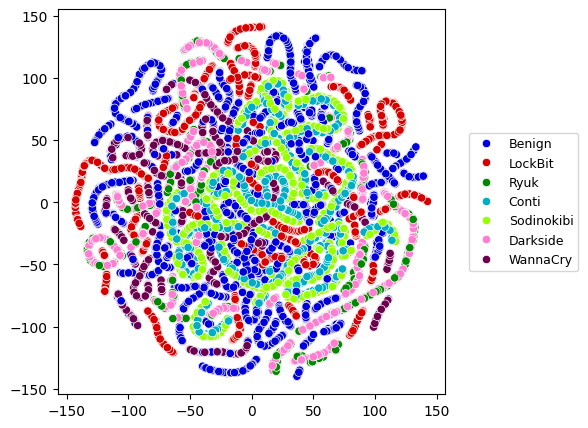

In [5]:
# Palette
from colorcet import glasbey
palette = sns.color_palette(glasbey, num_classes)
palette1 = sns.color_palette(glasbey, 16)
palette[0] = palette1[10]
palette[1] = palette1[0]

# Malware families of ransomware
fig,ax=plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(x = x_visualize[:,0]
                , y = x_visualize[:,1]
                , hue = y
                , palette = palette
                #, s = 50
                )

lg = plt.legend(loc="center right", bbox_to_anchor=(1.36, 0.5), prop = { "size": 9 })
lg.get_texts()[0].set_text("Benign")
lg.get_texts()[1].set_text("LockBit")
lg.get_texts()[2].set_text("Ryuk")
lg.get_texts()[3].set_text("Conti")
lg.get_texts()[4].set_text("Sodinokibi")
lg.get_texts()[5].set_text("Darkside")
lg.get_texts()[6].set_text("WannaCry")
plt.show()
